# Dominant Color Extraction
- Extract top k colours using K-Means

In [1]:
import cv2

In [119]:
# BGR format
image = cv2.imread('Images/elephant.jpg')

In [120]:
image.shape

(330, 500, 3)

In [121]:
import matplotlib.pyplot as plt

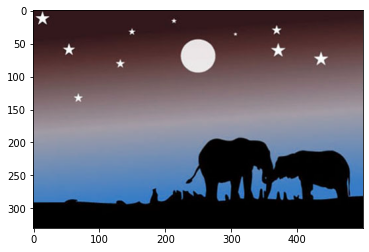

In [122]:
# displaying as RGB format
plt.imshow(image)
plt.show()

In [123]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

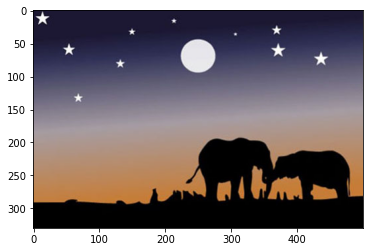

In [124]:
# displaying as RGB format
plt.imshow(image)
plt.show()

In [125]:
# Flatten each channel of the image to linear array

In [126]:
allPixels = image.reshape((-1, 3))
allPixels.shape

(165000, 3)

In [127]:
from sklearn.cluster import KMeans

In [138]:
dominantColors = 7
kmeans = KMeans(n_clusters=dominantColors)

In [139]:
kmeans.fit(allPixels)

KMeans(n_clusters=7)

In [140]:
kmeans.cluster_centers_

array([[115.96308708, 111.01568926, 130.91261742],
       [  1.42245307,   0.79328555,   1.12157967],
       [ 34.08670502,  30.99798658,  59.37344199],
       [232.86215913, 232.55472544, 236.82405678],
       [165.49195572, 147.65676811, 145.09658595],
       [189.20076096, 132.11343887,  82.35027479],
       [ 73.00317225,  71.41165274, 100.55191921]])

In [141]:
import numpy as np

In [142]:
centers = np.array(kmeans.cluster_centers_, dtype=np.uint8)

In [143]:
centers

array([[115, 111, 130],
       [  1,   0,   1],
       [ 34,  30,  59],
       [232, 232, 236],
       [165, 147, 145],
       [189, 132,  82],
       [ 73,  71, 100]], dtype=uint8)

# plot the colors obtained

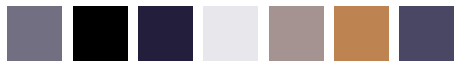

In [144]:
i = 1
plt.figure(0, figsize=(8, 2))
colors = []
for col in centers:
    plt.subplot(1, dominantColors, i)
    colors.append(col) 
    i += 1
    plt.axis('off')
    # color swatch
    a = np.zeros((100,100,3), dtype=np.uint8)
    a[:,:,:] = col
    plt.imshow(a)
plt.show()

# Segmenting the original image using the colors obtained from KMeans

In [145]:
newImage = np.zeros(image.shape, dtype=np.uint8)
newImage.shape

(330, 500, 3)

In [146]:
newImage = newImage.reshape((-1, 3))
newImage.shape

(165000, 3)

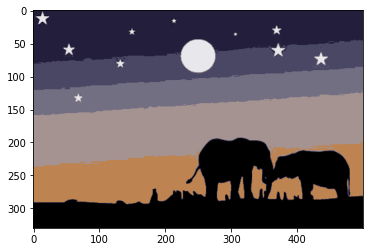

In [147]:
for ix in range(newImage.shape[0]):
    newImage[ix] = colors[kmeans.labels_[ix]]

newImage = newImage.reshape(image.shape)
plt.imshow(newImage)
plt.show()